# KDD'99 Statistical Analysis
**Links:**\
[KDD Cup 1999 Data](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)\
[KDD Detailed Analysis](https://ieeexplore.ieee.org/document/5356528)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import io
from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

# Define the column names (the KDD'99 dataset has 41 features and 2 target columns)
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", 
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", 
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", 
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", 
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack", "difficulty"
]

# Change the file path as needed
file_path = "Dataset/kddcup.data.gz"
df = pd.read_csv(file_path, names=column_names)

In [20]:
# Create a custom dataset information table
dataset_info = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.count().values,
    "Data Type": df.dtypes.astype(str).values
})

display(Markdown("### Dataset Information"))
display(dataset_info.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
))

### Dataset Information

,Column,Non-Null Count,Data Type
0,duration,4898431,int64
1,protocol_type,4898431,object
2,service,4898431,object
3,flag,4898431,object
4,src_bytes,4898431,int64
5,dst_bytes,4898431,int64
6,land,4898431,int64
7,wrong_fragment,4898431,int64
8,urgent,4898431,int64
9,hot,4898431,int64


In [24]:
# Display Statistical Summary for numeric features as a styled HTML table
display(Markdown("### Statistical Summary (Numeric Features)"))
display(df.describe().style.background_gradient(cmap='viridis').format("{:.2f}"))

### Statistical Summary (Numeric Features)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,0.00
mean,48.34,1834.62,1093.62,0.00,0.00,0.00,0.01,0.00,0.14,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,334.97,295.27,0.18,0.18,0.06,0.06,0.79,0.02,0.03,232.98,189.21,0.75,0.03,0.61,0.01,0.18,0.18,0.06,0.06,nan
std,723.33,941431.07,645012.33,0.00,0.04,0.01,0.47,0.01,0.35,3.86,0.01,0.01,3.94,0.12,0.01,0.04,0.00,0.00,0.03,211.99,245.99,0.38,0.38,0.23,0.23,0.39,0.08,0.14,64.02,105.91,0.41,0.11,0.48,0.04,0.38,0.38,0.23,0.23,nan
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan
25%,0.00,45.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,121.00,10.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255.00,49.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan
50%,0.00,520.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,510.00,510.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255.00,255.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan
75%,0.00,1032.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,511.00,511.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255.00,255.00,1.00,0.04,1.00,0.00,0.00,0.00,0.00,0.00,nan
max,58329.00,1379963888.00,1309937401.00,1.00,3.00,14.00,77.00,5.00,1.00,7479.00,1.00,2.00,7468.00,43.00,2.00,9.00,0.00,1.00,1.00,511.00,511.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,255.00,255.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan


In [26]:
# Convert Protocol Type Distribution to a DataFrame and display as a styled HTML table
protocol_counts = df['protocol_type'].value_counts().reset_index()
protocol_counts.columns = ['Protocol Type', 'Count']
display(Markdown("### Protocol Type Distribution"))
display(protocol_counts.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
))

### Protocol Type Distribution

,Protocol Type,Count
0,icmp,2833545
1,tcp,1870598
2,udp,194288


In [27]:
# Convert Attack Type Distribution to a DataFrame and display as a styled HTML table
attack_counts = df['attack'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']
display(Markdown("### Attack Type Distribution"))
display(attack_counts.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
))

### Attack Type Distribution

,Attack Type,Count
0,smurf.,2807886
1,neptune.,1072017
2,normal.,972781
3,satan.,15892
4,ipsweep.,12481
5,portsweep.,10413
6,nmap.,2316
7,back.,2203
8,warezclient.,1020
9,teardrop.,979


In [19]:
# Correlation analysis among numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

styled_corr = corr_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}")
display(styled_corr)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
duration,1.00,0.04,0.02,-0.00,-0.00,0.00,0.00,0.01,-0.02,0.03,0.03,0.05,0.03,0.10,-0.00,0.02,nan,-0.00,0.00,-0.11,-0.08,-0.03,-0.03,0.02,0.02,0.02,0.05,-0.01,0.01,-0.12,-0.12,0.41,0.04,-0.01,-0.03,-0.03,0.01,0.02,nan
src_bytes,0.04,1.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,nan
dst_bytes,0.02,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,nan,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,nan
land,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,-0.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.00,0.01,-0.01,-0.00,0.00,-0.00,0.00,0.03,0.00,0.00,-0.00,-0.00,nan
wrong_fragment,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,-0.00,-0.00,-0.02,-0.02,-0.00,-0.01,-0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.02,-0.02,0.02,-0.01,0.00,-0.01,-0.01,0.01,-0.00,nan
urgent,0.00,-0.00,0.00,-0.00,-0.00,1.00,0.00,0.03,0.00,0.02,0.09,0.13,0.03,0.01,0.00,0.02,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,nan
hot,0.00,0.00,0.00,-0.00,-0.00,0.00,1.00,0.00,0.06,0.00,0.02,0.00,0.00,0.02,0.00,0.00,nan,0.00,0.80,-0.04,-0.03,-0.01,-0.01,-0.01,-0.01,0.01,0.00,-0.00,-0.04,-0.03,-0.03,0.01,-0.03,-0.00,-0.01,-0.01,-0.01,-0.01,nan
num_failed_logins,0.01,-0.00,0.00,-0.00,-0.00,0.03,0.00,1.00,0.00,0.02,0.02,0.07,0.02,0.01,-0.00,0.00,nan,-0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.01,0.01,0.00,0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.01,0.00,nan
logged_in,-0.02,0.00,0.00,-0.00,-0.01,0.00,0.06,0.00,1.00,0.01,0.02,0.01,0.01,0.02,0.02,0.07,nan,0.00,0.07,-0.63,-0.47,-0.19,-0.19,-0.10,-0.10,0.22,-0.07,0.34,-0.63,0.13,0.16,-0.06,-0.46,0.14,-0.19,-0.19,-0.09,-0.09,nan
num_compromised,0.03,0.00,0.00,-0.00,-0.00,0.02,0.00,0.02,0.01,1.00,0.17,0.35,1.00,0.01,0.00,0.14,nan,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,nan


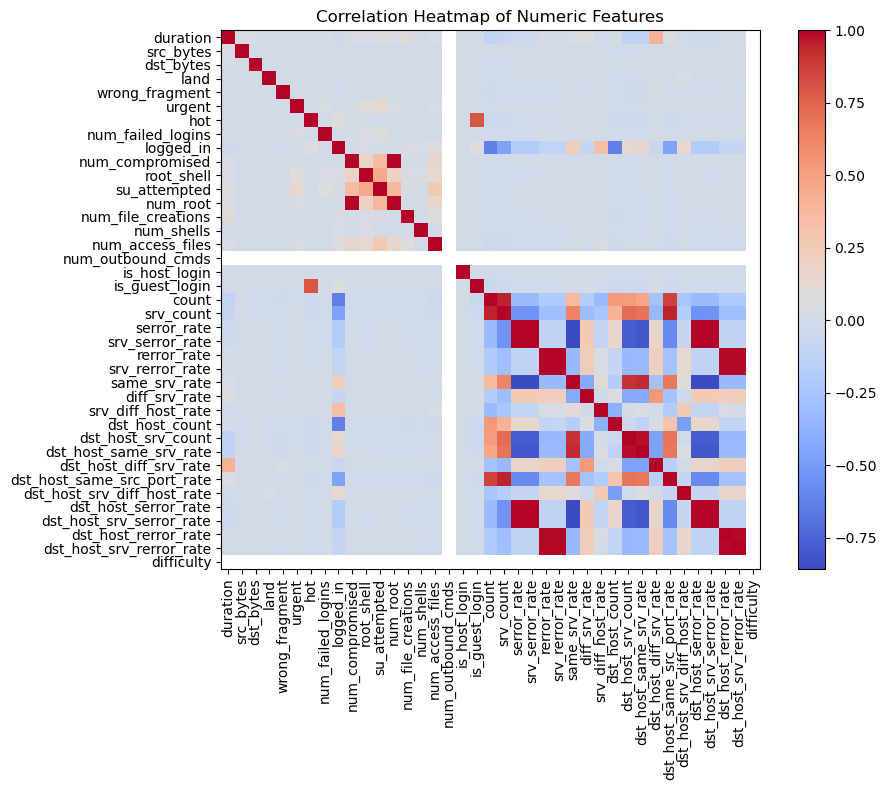

In [28]:
# Plot a correlation heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

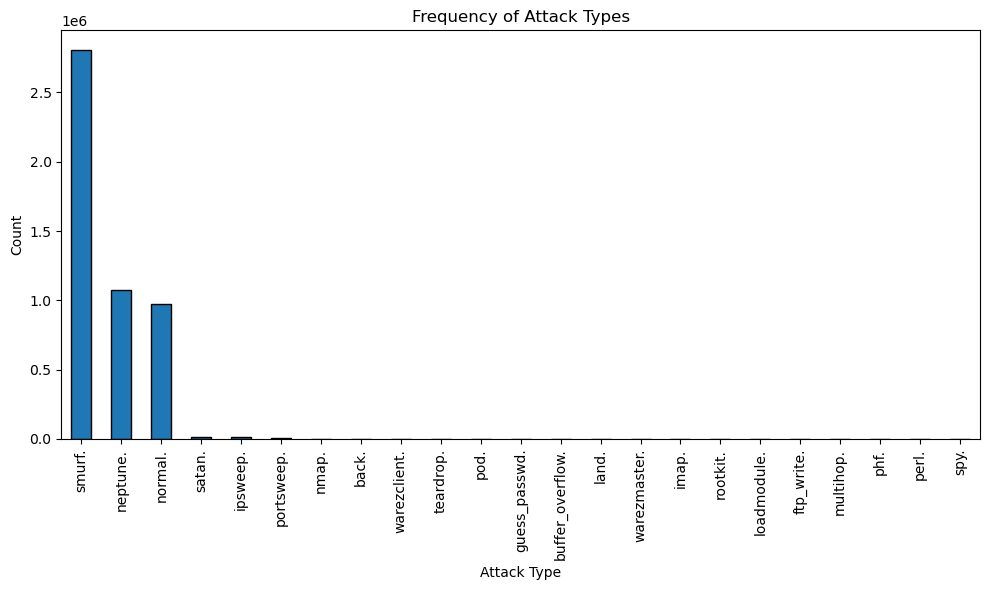

In [30]:
# Plot bar chart for attack type frequencies
plt.figure(figsize=(10, 6))
df['attack'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Frequency of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()